About the data:


## Source

Data obtained from: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv


## Content

You'll find most useful data for project analysis. Columns are self explanatory except:

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

## Acknowledgements

Data are collected from Kickstarter Platform

usd conversion (usdpledgedreal and usdgoalreal columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

## Problem statement: What causes kickstarter projects to be successful?

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
#Read in data (CSV)

df = pd.read_csv('ks-projects-201801.csv', index_col = 'ID')

#Note: Remember to read in ID as the index column!

In [3]:
#Check the size of the dataset:

print('No. of rows:', df.shape[0])
print('No. of columns:',df.shape[1])

No. of rows: 378661
No. of columns: 14


In [4]:
#Check first few rows of data:

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Part 1: Data cleaning

### Cleaning the target variable: 'State'

In [5]:
#Check the unique values of the target variable

df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [15]:
#Only keep projects that are either failed or successful

df = df[df['state'].isin(['failed','successful'])]

In [21]:
#Checking target variable counts again

df['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

### Cleaning null values

In [8]:
#Check null values
df.isnull().sum()

name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [14]:
#Not many null values, so we can just drop them

df = df.dropna()

#Check null values again:

df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## Part 2: EDA

In [32]:
df['state'].value_counts().index

Index(['failed', 'successful'], dtype='object')

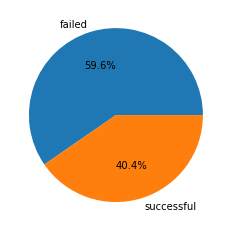

In [36]:
#Show the failure rate of projects

plt.pie(x = df['state'].value_counts(),
        labels = df['state'].value_counts().index,
        autopct='%1.1f%%')

plt.show()

<AxesSubplot:ylabel='main_category'>

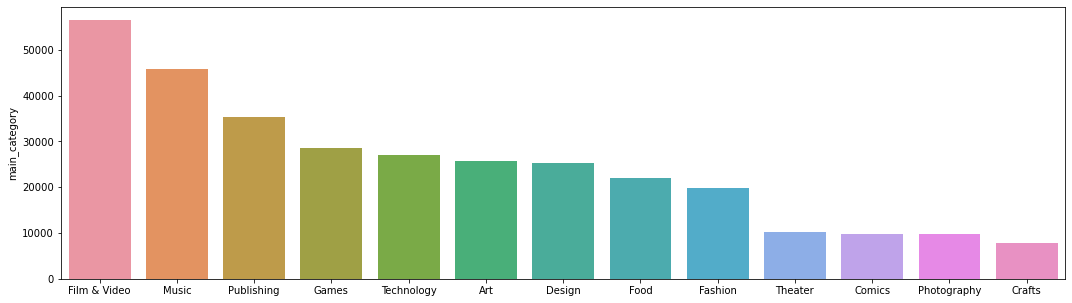

In [73]:
#Check the typical categories for projects

plt.figure(figsize = (18,5))

sns.barplot(x =  df['main_category'].value_counts()[:13].index,
            y =  df['main_category'].value_counts()[:13])

In [ ]:
#Seems like project distribution is pretty balanced, a good variety of all kinds of projects except for the last few

In [71]:
df['main_category'].value_counts()

Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: main_category, dtype: int64

In [74]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

<AxesSubplot:>

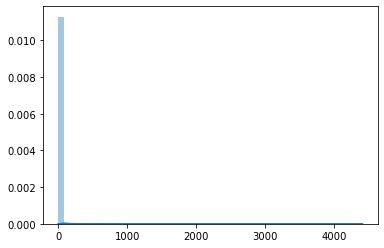

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
sns.distplot(scaler.fit_transform(df[['pledged']]))


<AxesSubplot:xlabel='pledged'>

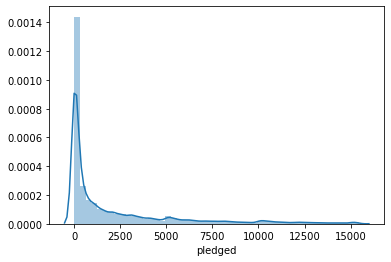

In [95]:
q_90 = np.quantile(df['pledged'],0.90)
q_10 = np.quantile(df['pledged'],0.1)

sns.distplot(df[df['pledged'] < q_90]['pledged'])
